# Chapter 1: What is a Neural Network? 

**What is a Neural Network?** : a **Neural Network** is a way to approximate complex functions using many simple units (neurons).

Think of it as stacking Lego blocks (neurons) to build a tower (network). Each block is simple, but together they create something powerful.


## 1. The Basic Neuron
A single **artificial neuron** takes inputs, multiplies them by weights, adds them, and applies a nonlinear function:

$$ z = w_1 x_1 + w_2 x_2 + b $$
$$ a = \sigma(z) $$

where $\sigma$ is an activation function (Sigmoid, ReLU, etc.).


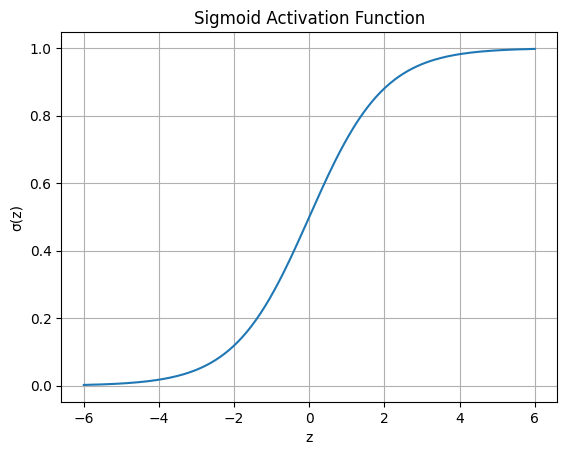

In [10]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

x = np.linspace(-6, 6, 200)
plt.plot(x, sigmoid(x))
plt.title("Sigmoid Activation Function")
plt.xlabel("z")
plt.ylabel("σ(z)")
plt.grid()
plt.show()

## 2. Layers of Neurons
A **layer** is just many neurons side by side. The output of one layer becomes the input of the next.

This composition of functions makes neural networks capable of approximating very complex mappings.


In [11]:
# Example: Forward pass in a small NN
def relu(z):
    return np.maximum(0, z)

# Input (2 features)
x = np.array([0.5, -0.2])

# Hidden layer (2 neurons)
W1 = np.array([[0.1, -0.2], [0.4, 0.3]])
b1 = np.array([0.0, 0.1])
z1 = np.dot(W1, x) + b1
a1 = relu(z1)

# Output layer (1 neuron)
W2 = np.array([[0.7, -0.5]])
b2 = np.array([0.0])
z2 = np.dot(W2, a1) + b2
output = sigmoid(z2)

print("Input:", x)
print("Hidden activations:", a1)
print("Output:", output)

Input: [ 0.5 -0.2]
Hidden activations: [0.09 0.24]
Output: [0.48575386]


## 3. Why Nonlinearity?
Without nonlinear activation functions, a stack of layers is still just a **linear function**.

With nonlinearities (ReLU, Sigmoid), we can approximate any function (Universal Approximation Theorem).


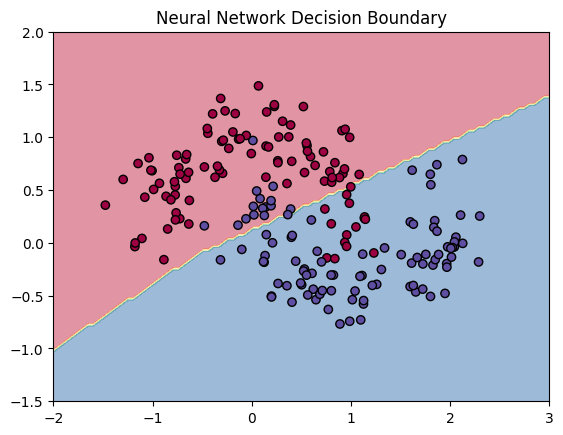

In [12]:
# Compare linear vs nonlinear decision boundaries
from sklearn.datasets import make_moons
from sklearn.neural_network import MLPClassifier

X, y = make_moons(n_samples=200, noise=0.2, random_state=42)

clf = MLPClassifier(hidden_layer_sizes=(5,), max_iter=1000).fit(X, y)

# Plot
xx, yy = np.meshgrid(np.linspace(-2, 3, 100), np.linspace(-1.5, 2, 100))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.5)
plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.Spectral, edgecolors='k')
plt.title("Neural Network Decision Boundary")
plt.show()

## Conclusion
A Neural Network = stacked nonlinear functions (neurons in layers) trained to approximate mappings from inputs to outputs.


# Chapter 2: Gradient Descent – How Neural Networks Learn

 The method is called **Gradient Descent**, where the network gradually adjusts its weights to reduce prediction error.

## 1. The Learning Problem
Neural networks have many weights $w$ and biases $b$. Training means finding values that minimize the **loss function** (error).

Typical loss for regression:

$$ L = \frac{1}{n} \sum_{i=1}^n (y^{(i)} - \hat{y}^{(i)})^2 $$

where $y^{(i)}$ is the true label, $\hat{y}^{(i)}$ is the predicted output.


## 2. Gradient Descent Idea
Imagine Person standing on a hill (the error surface). To reach the bottom (minimum error), he takes steps opposite the slope (gradient).

$$ w := w - \eta \frac{\partial L}{\partial w} $$

- $\eta$ = learning rate (step size)
- $\frac{\partial L}{\partial w}$ = gradient of loss with respect to weights

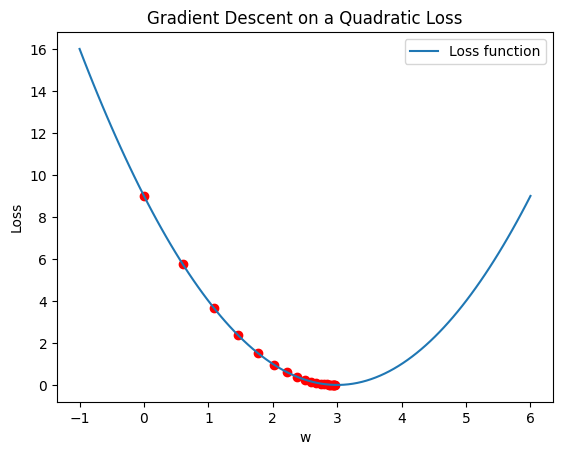

In [13]:
import numpy as np
import matplotlib.pyplot as plt

# Simple quadratic loss function L = (w-3)^2
def loss(w):
    return (w-3)**2

def grad(w):
    return 2*(w-3)

w = 0  # initial guess
eta = 0.1  # learning rate
history = [w]

for i in range(20):
    w = w - eta*grad(w)
    history.append(w)

ws = np.linspace(-1,6,100)
plt.plot(ws, loss(ws), label='Loss function')
plt.scatter(history, [loss(h) for h in history], color='red')
plt.title("Gradient Descent on a Quadratic Loss")
plt.xlabel("w")
plt.ylabel("Loss")
plt.legend()
plt.show()

## 3. Gradient Descent in Neural Networks
For a neural network:
1. **Forward pass**: compute predictions.
2. **Loss calculation**: measure error.
3. **Backward pass (backpropagation)**: compute gradients using chain rule.
4. **Update weights**: move opposite to gradient.

c:\Users\zeelp\anaconda3\envs\ml-gpu\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


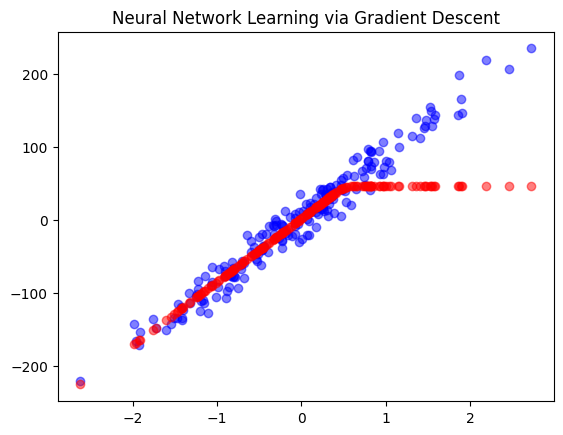

In [14]:
from sklearn.datasets import make_regression
from sklearn.neural_network import MLPRegressor

X, y = make_regression(n_samples=200, n_features=1, noise=15, random_state=42)

model = MLPRegressor(hidden_layer_sizes=(5,), max_iter=1000, learning_rate_init=0.05)
model.fit(X, y)

plt.scatter(X, y, color='blue', alpha=0.5)
plt.scatter(X, model.predict(X), color='red', alpha=0.5)
plt.title("Neural Network Learning via Gradient Descent")
plt.show()

## 4. Learning Rate Effect
- Too small $\eta$: learning is slow.
- Too large $\eta$: overshooting, unstable.
- Just right: converges smoothly.

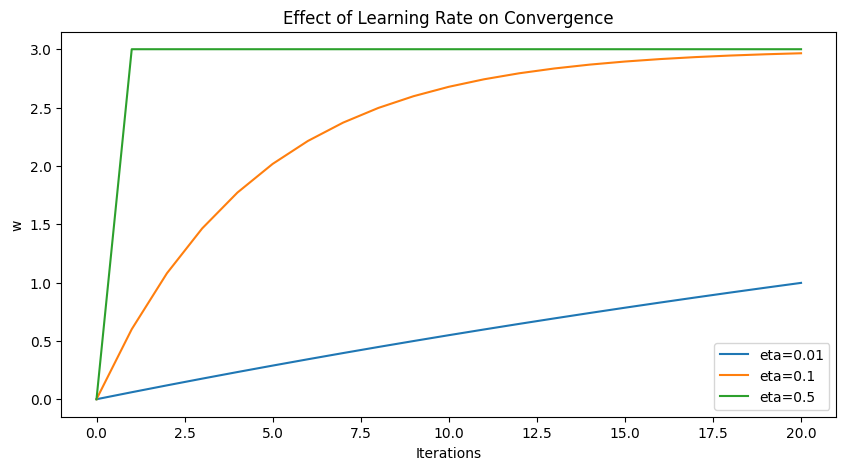

In [15]:
etas = [0.01, 0.1, 0.5]
plt.figure(figsize=(10,5))
for eta in etas:
    w = 0
    history = [w]
    for i in range(20):
        w = w - eta*grad(w)
        history.append(w)
    plt.plot(history, label=f"eta={eta}")

plt.xlabel("Iterations")
plt.ylabel("w")
plt.title("Effect of Learning Rate on Convergence")
plt.legend()
plt.show()

## Conclusion
**Gradient Descent** is the main way neural networks learn. By adjusting weights opposite the gradient of loss, the network gradually improves its predictions.


# Chapter 3: Backpropagation

**Backpropagation** is the method neural networks use to *learn*. It tells each weight how it should change to reduce the error.

Neural networks learn by adjusting weights to reduce error.
- Forward pass: compute prediction.
- Backward pass: compute gradients (derivatives of loss wrt weights).

At its core, it’s just repeated use of the **chain rule** from calculus.

Goal: Understand **why backprop works** and **how to compute gradients** precisely.


## 1. Why Backpropagation?
We want to minimize a **loss function** $L$ that measures how far predictions are from targets.

For example, Mean Squared Error (MSE):
$$ L = \frac{1}{2} (y_{pred} - y_{true})^2 $$

We adjust weights using Gradient Descent:
$$ w \leftarrow w - \eta \frac{\partial L}{\partial w} $$
where $\eta$ is the learning rate.


## 2.A Forward Pass Recap

Neuron equations:
$$ z = W x + b $$
$$ a = \sigma(z) $$

Example activation functions:
- Sigmoid: $\sigma(z) = \frac{1}{1+e^{-z}}$
- ReLU: $\text{ReLU}(z) = \max(0,z)$


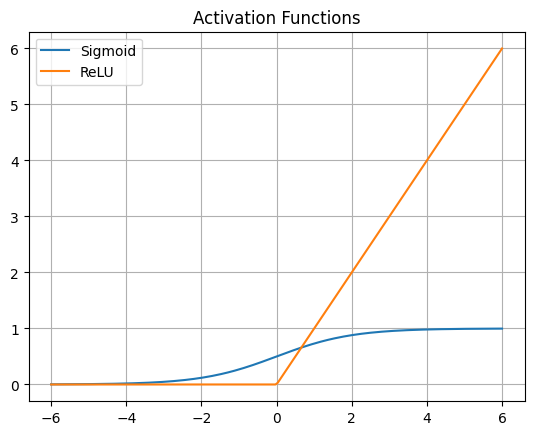

In [16]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(z):
    return 1 / (1 + np.exp(-z))
def sigmoid_deriv(z):
    s = sigmoid(z)
    return s * (1 - s)

def relu(z):
    return np.maximum(0, z)
def relu_deriv(z):
    return (z > 0).astype(float)

# Plot sigmoid and relu
x_vals = np.linspace(-6,6,200)
plt.plot(x_vals, sigmoid(x_vals), label='Sigmoid')
plt.plot(x_vals, relu(x_vals), label='ReLU')
plt.legend(); plt.grid(); plt.title("Activation Functions"); plt.show()

## 2.B Forward Pass (Toy Network) (Example)

Consider a simple NN:

- 2 inputs → 2 hidden neurons (ReLU) → 1 output neuron (Sigmoid).

We’ll do forward and backward pass manually.


In [17]:
import numpy as np

def sigmoid(z):
    return 1 / (1 + np.exp(-z))
def sigmoid_deriv(z):
    s = sigmoid(z)
    return s * (1 - s)

def relu(z):
    return np.maximum(0, z)
def relu_deriv(z):
    return (z > 0).astype(float)

# Input and target
x = np.array([[0.5], [0.2]])
y_true = np.array([[1]])

# Weights and biases
W1 = np.array([[0.1, -0.2], [0.4, 0.3]])
b1 = np.array([[0.0], [0.1]])
W2 = np.array([[0.7, -0.5]])
b2 = np.array([[0.0]])

# Forward pass
z1 = np.dot(W1, x) + b1
a1 = relu(z1)
z2 = np.dot(W2, a1) + b2
a2 = sigmoid(z2)

loss = 0.5 * (a2 - y_true)**2
print("Prediction:", a2)
print("Loss:", loss)

Prediction: [[0.45685755]]
Loss: [[0.14750186]]


## 3. Chain Rule Intuition
To know how $L$ changes with respect to $W_2$, we chain derivatives:

$$ \frac{\partial L}{\partial W_2} = \frac{\partial L}{\partial a_2} \cdot \frac{\partial a_2}{\partial z_2} \cdot \frac{\partial z_2}{\partial W_2} $$

Similarly, for hidden weights $W_1$:

$$ \frac{\partial L}{\partial W_1} = \frac{\partial L}{\partial a_1} \cdot \frac{\partial a_1}{\partial z_1} \cdot \frac{\partial z_1}{\partial W_1} $$


In [18]:
# Backward pass
dL_da2 = (a2 - y_true)
da2_dz2 = sigmoid_deriv(z2)
dz2_dW2 = a1.T

dL_dW2 = dL_da2 * da2_dz2 * dz2_dW2
dL_db2 = dL_da2 * da2_dz2

# Backprop into hidden layer
dL_dz2 = dL_da2 * da2_dz2
dL_da1 = W2.T * dL_dz2
da1_dz1 = relu_deriv(z1)
dz1_dW1 = x.T

dL_dW1 = np.dot(dL_da1 * da1_dz1, dz1_dW1)
dL_db1 = dL_da1 * da1_dz1

print("Gradients:")
print("dL/dW2 =", dL_dW2)
print("dL/db2 =", dL_db2)
print("dL/dW1 =", dL_dW1)
print("dL/db1 =", dL_db1)

Gradients:
dL/dW2 = [[-0.00134775 -0.04851888]]
dL/db2 = [[-0.13477468]]
dL/dW1 = [[-0.04717114 -0.01886845]
 [ 0.03369367  0.01347747]]
dL/db1 = [[-0.09434227]
 [ 0.06738734]]


## 4. Numerical Gradient Check

We can check our gradient by comparing with finite-difference approximation:
$$ \frac{dL}{dw} \approx \frac{L(w+\epsilon)-L(w-\epsilon)}{2\epsilon} $$


In [19]:
eps = 1e-5
W2_eps = W2.copy()
W2_eps[0,0]+=eps
L_plus = 0.5*(sigmoid(np.dot(W2_eps,a1)+b2)-y_true)**2
W2_eps[0,0]-=2*eps
L_minus = 0.5*(sigmoid(np.dot(W2_eps,a1)+b2)-y_true)**2
num_grad = (L_plus-L_minus)/(2*eps)

print("Numerical gradient approx (W2[0,0]):",num_grad)
print("Analytical gradient (W2[0,0]):",dL_dW2[0,0])

Numerical gradient approx (W2[0,0]): [[-0.00134775]]
Analytical gradient (W2[0,0]): -0.001347746777693076


## 5. Conclusion
- **Forward pass** computes predictions.
- **Backward pass** applies the chain rule to compute gradients.
- Gradients tell us how to update weights to reduce loss.

This is the heart of how neural networks *learn*.
